# Assignment 3: Shubhayan Bhattacharya, IIT Madras (GroupB, ML)

### Question 1:	List down the step of Model development

#### Ans. The step of model development are as follows:
- Data type (finding the nature of data)
- Dependent variable type (classification/regression)
- Independent variable (correlation between the independent variables)
- Model description
- Train and test the data
- Fit the data
- Prediction of data
- Confusion matrix
- ROC curve (for checking the model accuracy)

### Question 2: Define R square

#### Ans. R square also called the coefficient of determination is defined as the proportion of variance in the dependent variable that is predicatble from independent variable(s) in a regression model. If the R square of a model is 0.65, 65% of the observed variation can be explained by the input values. 

### Question 3: Define adjusted R square

#### Ans. R square as described above assumes that every single variable is dependent on the variation of the dependent variable. The adjusted R square gives the knowledge of the percentage of variation explained by only the indendent variables that actually affect the dependent variable. 

### Question 4: Define mean square error

#### Ans. Mean squared error of an estimator is defined as the average squared difference between the estimated values and actual values measuring the average square o errors. 

### Question 5: Define root mean square error (RMSE)

#### Ans. The RMSE of an estimator for an estimated parameter is the square root of the mean square error. 

### Question 6: Define mean absolute percentage error (MAPE)

#### Ans. In statistics MAPE is used as a measure of the prediction of accuracy of a forecasting method. 
\begin{equation}
MAPE = (100/n)\sum_{t=1}^{n} [(A_t-F_t)/A_t]
\end{equation}

#### where A and F represent the actual and forecast value. 

### Question 7: What are the assumptions of linear regression?


#### Ans. The assumptions of linear regression are as follows:
- First and foremost, the relationship between the independent and dependent variables must be linear
- The linear regression requires all variables to be multivariate normal
- It assumes that no or very little multicollinearity is there in the data. If the independent variables are highly correlated with each other, multicollinearity occurs. 
- No autocorrelation should be present i.e the degree of correlation between the values of the same variable across different observations in the data
- Homoscedasticity should be present i.e the noise/random disturbance between the dependent and independent variables must be same across all observations. This can be checked by scatter plots. 

### Question 8: Define multicollinearity 

#### Ans.  High inter association or inter correlation between the independent variables in the data is called multicollinearity. The inferences/conclusions made from a data having high multicollinearity may not be reliable. 

### Question 9: Make a wine prediction model through linear regression 

#### Ans. Please see the end of this document. 

### Question 10: How decision tree works

#### Ans. The main aim of decision tree is to create a training model which can predict value of target variables by learning decision rules as trained by previous data. It works in the following way: 
- Decision tree algorithm aims to solve a problem by using tree representation
- Each internal node of a decision tree corresponds to an attribute and each leaf node corresponds to a class label
- The best attribute of a data is placed at the root of a tree
- The training set is divided into various subsets (Splitting). The subsets are created in such a way that each subset contains data with the same value for an attribute
- The last two steps are repeated until one finds leaf nodes in all branches of the tree

### Question 11: Define splitting and stopping criteria of a decision tree

#### Ans. Splitting is defined as the partitioning of data into various subsets. Splits are formed on a particular variable.
#### The stopping criteria of a decision tree are as follows:
- Number of cases in the node is less than some pre-specified limit.
- Purity of the node is more than some pre-specified limit. 
- Depth of the node is more than some pre-specified limit.
- Predictor values for all records are identical - in which no rule could be generated to split them.

### Question 12: What is entropy?

#### Ans. The homogenity of a sample is found from the value of entropy calculated. If the value of entropy is 0, the sample is completely homogeneous, while if the sample is equally divided it has an entropy of 1. 

### Question 13: What is Gini?

#### Ans. Gini index implies that, if two items are selected from a population at random, then these items must be from the same class and the probability for this is 1, if the population is pure. Gini index only performs binary splits, and works with categorical target variable such as "yes" or "no".  Higher the value of Gini index higher is the homogenity of the data class. 

### Question 14: What is information gain? 

#### Ans. Information gain (IG) measures how much “information” a feature gives us about the class. The features that perfectly partition should give maximal information and the unrelated features should give no information.

### Question 15: How to identify overfitting? 

#### Ans. Overfitting can be detected by finding whether the model fits new data as well as the data used to estimate the model. In the case of linear regression, overfitting can be easily predicted by the cross validation method called the predicted R squared (measured by the statistical software). 

## Question 9: Wine price prediction model 

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [85]:
wine = pd.read_csv(r"C:\Users\Bisht\Downloads\Python\Programs and Data\EDA-master\wine.csv")

### Data shape and attributes

In [86]:
print(wine.shape)
wine.head()

(25, 7)


,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


### Description of the data

In [87]:
wine.describe()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1965.800000,7.067224,605.280000,16.509336,148.560000,17.200000,49694.436760
std,7.691987,0.650341,132.277965,0.675397,74.419464,7.691987,3665.270243
min,1952.000000,6.204900,376.000000,14.983300,38.000000,5.000000,43183.569000
25%,1960.000000,6.518800,536.000000,16.200000,89.000000,11.000000,46583.995000
50%,1966.000000,7.121100,600.000000,16.533300,130.000000,17.000000,50254.966000
75%,1972.000000,7.495000,697.000000,17.066700,187.000000,23.000000,52894.183000
max,1978.000000,8.493700,830.000000,17.650000,292.000000,31.000000,54602.193000


### Checking for any missing values in the data set

In [88]:
wine.isnull().sum()

Year           0
Price          0
WinterRain     0
AGST           0
HarvestRain    0
Age            0
FrancePop      0
dtype: int64

### Independent variables

In [166]:
X = wine[[ 'WinterRain', 'AGST', 'HarvestRain', 'Age',
       'FrancePop']]

### Target variable is price

In [167]:
y = wine[['Price']]

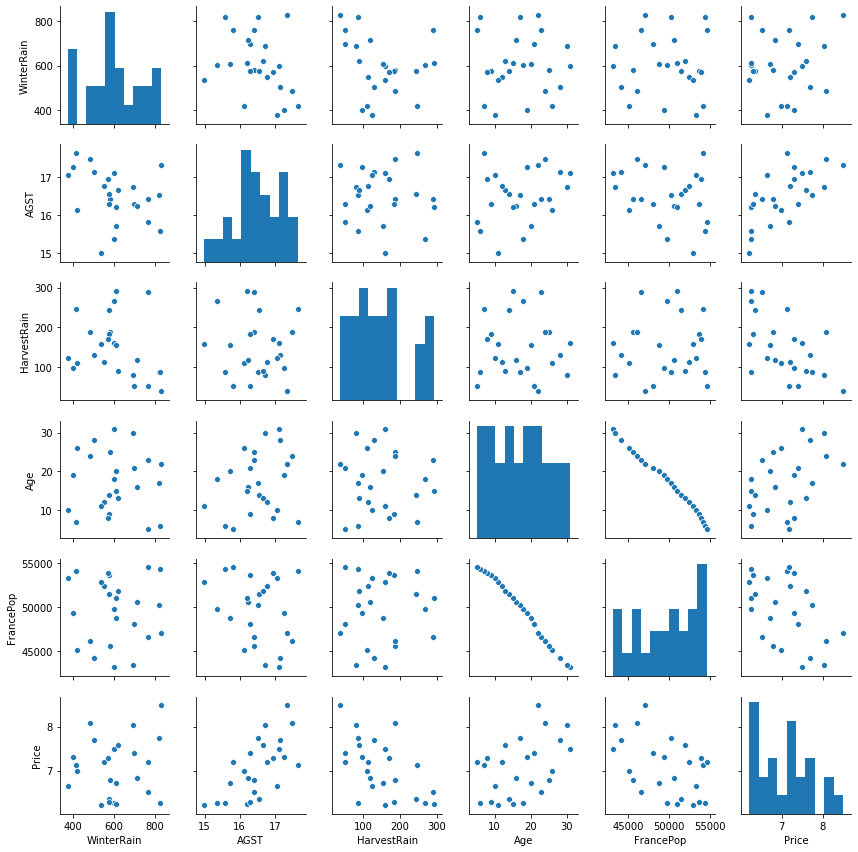

In [181]:
sns.pairplot(wine[['WinterRain',"AGST","HarvestRain","Age", "FrancePop","Price"]],height=2)

### Checking correlation among the input variables

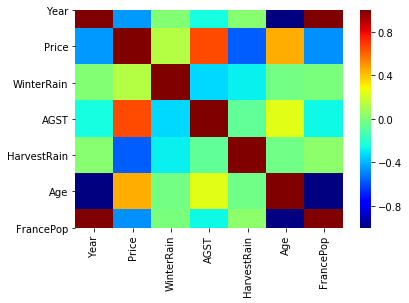

In [182]:
import seaborn as sns
sns.heatmap(wine.corr(),cmap='jet')

### Importing train and test split library

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 100 )

In [169]:
X_test

,WinterRain,AGST,HarvestRain,Age,FrancePop
9,608,15.7167,155,20,48798.990
22,418,17.6500,247,7,54159.049
13,714,16.2333,118,16,50650.406
11,602,15.3667,267,18,49801.821
5,485,17.4833,187,24,46128.638


In [170]:
X_train

,WinterRain,AGST,HarvestRain,Age,FrancePop
19,376,17.0667,123,10,53332.805
23,821,15.5833,87,6,54378.362
21,572,16.9500,171,8,53955.042
6,763,16.4167,290,23,46583.995
12,819,16.5333,86,17,50254.966
4,582,16.4167,187,25,45653.805
24,763,15.8167,51,5,54602.193
0,600,17.1167,160,31,43183.569
1,690,16.7333,80,30,43495.030
20,574,16.3000,184,9,53689.610


In [171]:
y_train

,Price
19,6.6367
23,6.2587
21,7.2920
6,6.5188
12,7.7443
4,6.7772
24,7.1860
0,7.4950
1,8.0393
20,6.2941


In [172]:
y_test

,Price
9,6.7127
22,7.1211
13,6.8398
11,6.2518
5,8.0757


In [173]:
import statsmodels.api as sm
lm1 = sm.OLS(y_train,X_train).fit()
# print the coefficients
lm1.params

WinterRain     0.001265
AGST           0.538851
HarvestRain   -0.004890
Age            0.005132
FrancePop     -0.000041
dtype: float64

In [174]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              2863.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):                    8.66e-22
Time:                        22:10:42   Log-Likelihood:                          1.0013
No. Observations:                  20   AIC:                                      7.997
Df Residuals:                      15   BIC:                                      12.98
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
WinterRain      0.0013      0.000      2.776      0.014       0.000       0.002
AGST            0.5389      0.121      4.459      0.000       0.281       0.796
HarvestRain    -0.0049      0.001     -5.703      0.000      -0.007      -0.003
Age             0.0051      0.021      0.241      0.813      -0.040       0.050
FrancePop   -4.052e-05   3.52e-05     -1.151      0.268      -0.000    3.45e-05
==============================================================================
Omnibus:                        1.525   Durbin-Watson:                   2.395
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                0.651
Skew:                          -0.436   Prob(JB):                        0.722
Kurtosis:                       3.145   Cond. No.                     1.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Adj. R- squared value: 
#### It's most useful as a tool for comparing different models.

#### Is has value 99.9%. It suggests that 99.9% wine price can be estimated by these predictor variables.

### Regression coefficient: 
#### It represents the change in the target variable due to change of one predictor variable by one unit when other predictor variables are constant. 
#### We have selected all predictor variables in this case
#### The coefficient values for these variables are 0.001265, 0.538851, -0.004890, 0.005132 and -0.000041.


### Standard error:

#### It measures the accuracy of coefficient by estimating the variation of the coefficient if the same test were run on a different sample of our population. The standard errors have been found to be 0, 0.121, 0.001, 0.021 and 0.0000352 respectively for 'WinterRain', 'AGST', 'HarvestRain', 'Age' and 'FrancePop' respectively. 

### Hypothesis testing and p-value

#### (1) We assume the null hypothesis that there is no linear relationship between predictor and target variables. So, linear coefficients would be zero.
#### (2) But we get non-zero values of the coefficients of the predictor variables which rejects the null hypothesis. 

#### (3) The p-value corresponds to the probability that the coefficient is actually zero. Here, p-value is very small (<0.05) and it is zero for 'WinterRain', 'AGST' and 'HarvestRain' while the p-value is higher (>0.05) for the predictor variables 'Age' and 'FrancePop'. We can reject the null hypothesis. We can say that there is linear dependence of the house price on the predictor variables 'WinterRain', 'AGST' and 'HarvestRain'.

### Confidence interval:

#### Confidence interval is a range within which our coefficients are likely to fall. Here, coefficients are showing the probable range of the estimated coefficients.
#### For example, the cofidence interval for 'WinterRain' is 0, 0.002 and for  'AGST' the interval is 0.281, 0.796.

### Training and testing the data

In [175]:
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X, y,train_size=0.8, random_state=100)
lrm= LinearRegression()
lrm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model coefficients

In [176]:
print(lrm.intercept_)
print(lrm.coef_)

[-7.57506402]
[[ 1.39978026e-03  5.35221087e-01 -4.94386390e-03  6.76070446e-02
   9.00499781e-05]]


In [177]:
y_pred = lrm.predict(X_test)
print(y_pred)

[[6.6681016 ]
 [6.58583242]
 [7.17218828]
 [5.8737536 ]
 [7.3132096 ]]


In [178]:
lrm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### MSE, MAE, RMSE computation

In [179]:
from sklearn import metrics
print("Mean square error =",(metrics.mean_squared_error(y_test, y_pred)))
print("Root mean square error =",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Mean absolute error =",metrics.mean_absolute_error(y_test,y_pred))

Mean square error = 0.22465861294785733
Root mean square error = 0.4739816588728485
Mean absolute error = 0.41055821228588574


### Conclusions:
#### (1)  Price of the wine depends on all the variables but is largely dependent on 'WinterRain', 'AGST' and 'HarvestRain'. 
#### (2)  p-value of the individual predictiors 'WinterRain', 'AGST' and 'HarvestRain' reject the null hypothesis of no linear relationship between predictors and the target value.

# Please check the PDF file also for the model parameters to arrive at the conclusion. 